C:\Users\churi\anaconda3\lib\site-packages\libpysal\weights\util.py:1073: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = np.vstack([np.array(shape.centroid) for shape in first_choice])


{0: 6,
 1: 6,
 2: 7,
 3: 7,
 4: 4,
 5: 4,
 6: 10,
 7: 6,
 8: 7,
 9: 6,
 10: 5,
 11: 6,
 12: 7,
 13: 1,
 14: 6,
 15: 7,
 16: 7,
 17: 4,
 18: 7,
 19: 4,
 20: 6,
 21: 4,
 22: 7,
 23: 5,
 24: 4,
 25: 6,
 26: 7,
 27: 5,
 28: 6,
 29: 6,
 30: 6,
 31: 3,
 32: 5,
 33: 7,
 34: 7,
 35: 6,
 36: 6,
 37: 5,
 38: 5,
 39: 6,
 40: 6,
 41: 7,
 42: 6,
 43: 5,
 44: 12,
 45: 6,
 46: 5,
 47: 4,
 48: 5,
 49: 7,
 50: 4,
 51: 4,
 52: 6,
 53: 5,
 54: 5,
 55: 6,
 56: 6,
 57: 9,
 58: 6,
 59: 8,
 60: 5,
 61: 5,
 62: 6,
 63: 5,
 64: 7,
 65: 6,
 66: 6,
 67: 5,
 68: 8,
 69: 5,
 70: 6,
 71: 5,
 72: 5,
 73: 6,
 74: 4,
 75: 6,
 76: 8,
 77: 5,
 78: 4,
 79: 7,
 80: 7,
 81: 6,
 82: 4,
 83: 6,
 84: 7,
 85: 7,
 86: 4,
 87: 5,
 88: 7,
 89: 7,
 90: 6,
 91: 4,
 92: 7,
 93: 8,
 94: 7,
 95: 6,
 96: 3,
 97: 7,
 98: 6,
 99: 8,
 100: 3,
 101: 7,
 102: 7,
 103: 3,
 104: 8,
 105: 5,
 106: 4,
 107: 4,
 108: 5,
 109: 8,
 110: 7,
 111: 5,
 112: 7,
 113: 7,
 114: 9,
 115: 7,
 116: 5,
 117: 7,
 118: 9,
 119: 6,
 120: 7,
 121: 7,
 122: 7,
 

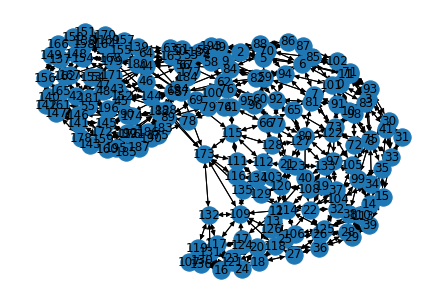

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import esda
from pysal.lib import weights
import libpysal
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from esda.moran import (Moran, Moran_BV,
                        Moran_Local, Moran_Local_BV)
from scipy.spatial import distance

#from esda.moran import Moran_Local
from libpysal.weights.contiguity import Queen
import networkx as nx

satellite = gpd.read_file("../js/posData_en_csv2.geojson") 
satellite

a = satellite["x_num"]
b = satellite["y_num"]
c = []

ran = []
for i in range(len(satellite)):
    d = (a[i],b[i])
    c.append(d)

#wnn7= weights.KNN.from_dataframe(satellite, k=7)


x = satellite['number'].values
y = satellite['amount'].values
w = Queen.from_dataframe(satellite)
w.transform = 'r'

moran = Moran(y, w,permutations=200,two_tailed=False)
#moran_bv = Moran_BV(y, x, w)
#moran_loc = Moran_Local(y, w)
#moran_loc_bv = Moran_Local_BV(y, x, w)
moran_p = moran.p_sim
moran_z = moran.z_sim

'''
tmp_p = 1
tmp_z = 1

while(moran_p>0.1):
    moran = Moran(y, w,permutations=200,two_tailed=False)
    #moran_bv = Moran_BV(y, x, w)
    #moran_loc = Moran_Local(y, w)
    #moran_loc_bv = Moran_Local_BV(y, x, w)
    moran_p = moran.p_sim
    moran_z = moran.z_sim


    #fig, axs = plt.subplots(2, 2, figsize=(10,10),subplot_kw={'aspect': 'equal'})
    #fig, axs = plt.subplots(figsize=(15,15))
    if moran_p<tmp_p :
        tmp_p = moran_p
        tmp_z = moran_z
        say = "P : " + str(moran_p) + ", Z : " + str(moran_z)
        print(say)
        
'''

#print("last")
#say = "P : " + str(moran_p) + ", Z : " + str(moran_z)
#print(say)
#moran_scatterplot(moran)
#moran_scatterplot(moran_loc, p=0.05)
#moran_scatterplot(moran_bv, p=0.05)
#moran_scatterplot(moran_loc_bv, p=0.05)

#plt.ylim([-1.5, 1.5])
#plt.show()

#가중치 그래프
g1 = w.to_networkx()
nx.draw(g1, with_labels = True)
#w.cardinalities
#w.asymmetries

# save
#plt.savefig("Moran", dpi = 72)